In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
ctg = ['musicality', 'note accuracy', 'rhythmic accuracy', 'tone quality']

In [3]:
def loadMatFile(name):
    matfile = sio.loadmat(name)
    return matfile['AccuList'], matfile['NewList']

In [4]:
acculist_sr = [loadMatFile(str(i) + 'forward_fullset_sr')[0] for i in np.arange(1,5)]
newlist_sr = [loadMatFile(str(i) + 'forward_fullset_sr')[1] for i in np.arange(1,5)]
acculist_tech = [loadMatFile(str(i) + 'forward_fullset_tech')[0] for i in np.arange(1,5)]
newlist_tech = [loadMatFile(str(i) + 'forward_fullset_tech')[1] for i in np.arange(1,5)]

In [5]:
def compareCategories(featureGroup):
    # plot the accuracy curve and the order of features in featureGroup (4 categories)
    # featureGroup: index of features in a group
    fig = plt.figure(figsize=(18,24))
    for i in np.arange(1, 5):
        I = np.argsort(newlist_tech[i-1].flatten())
        p_feature = I[featureGroup-1]+1
        
        plt.subplot(4,2,2*i-1)
        # plot the accuracy: technical
        plt.plot(np.arange(1,136), acculist_tech[i-1].flatten())
        # plot the positions of features in featureGroup
        plt.plot(p_feature, np.zeros_like(p_feature) + 0.2, 'x')
        plt.ylim([0, 0.6])
        plt.ylabel('RSQ')
        plt.title(ctg[i-1])
        
        I = np.argsort(newlist_sr[i-1].flatten())
        p_feature = I[featureGroup-1]+1
        
        plt.subplot(4,2,2*i)
        # plot the accuracy: sight-reading
        plt.plot(np.arange(1,136), acculist_sr[i-1].flatten())
        # plot the positions of features in featureGroup
        plt.plot(p_feature, np.zeros_like(p_feature) + 0.2, 'x')
        plt.ylim([0, 0.6])
        plt.ylabel('RSQ')
        plt.title(ctg[i-1])

    plt.show()

In [6]:
def compareGroups(ctgIdx, featureGroups, groupName):
    # plot the accuracy curve and the order of features in featureGroup
    # sight-reading/technical, one category, compare among groups
    # newlist: a list of feature idx, order in feature selection (4 category)
    # acculist: corresponding accuracy (Rsq) (4 category)
    # featureGroups: a list of feature groups
    groupNum = len(featureGroups)
    fig = plt.figure(figsize=(18,5*groupNum))
    for i in np.arange(groupNum):
        I = np.argsort(newlist_tech[ctgIdx-1].flatten())
        p_feature = I[featureGroups[i]-1]+1
        
        plt.subplot(groupNum, 2, 2*i+1)
        # plot the accuracy: technical
        plt.plot(np.arange(1,136), acculist_tech[ctgIdx-1].flatten())
        # plot the positions of features in featureGroup
        plt.plot(p_feature, np.zeros_like(p_feature) + 0.2, 'x')
        plt.ylabel('RSQ')
        plt.ylim([0, 0.6])
        plt.title(groupName[i])
        
        I = np.argsort(newlist_sr[ctgIdx-1].flatten())
        p_feature = I[featureGroups[i]-1]+1
        
        plt.subplot(groupNum, 2, 2*i+2)
        # plot the accuracy: sight-reading
        plt.plot(np.arange(1,136), acculist_sr[ctgIdx-1].flatten())
        # plot the positions of features in featureGroup
        plt.plot(p_feature, np.zeros_like(p_feature) + 0.2, 'x')
        plt.ylabel('RSQ')
        plt.ylim([0, 0.6])
        plt.title(groupName[i])

    plt.show()

# Left: Technical Exercise
# Right: Sight-reading exercise

In [8]:
# feature groups
# std, nonscore, score
feature_std = np.arange(1, 69)
feature_nonscore = np.arange(69, 93)
feature_score = np.arange(93, 136)

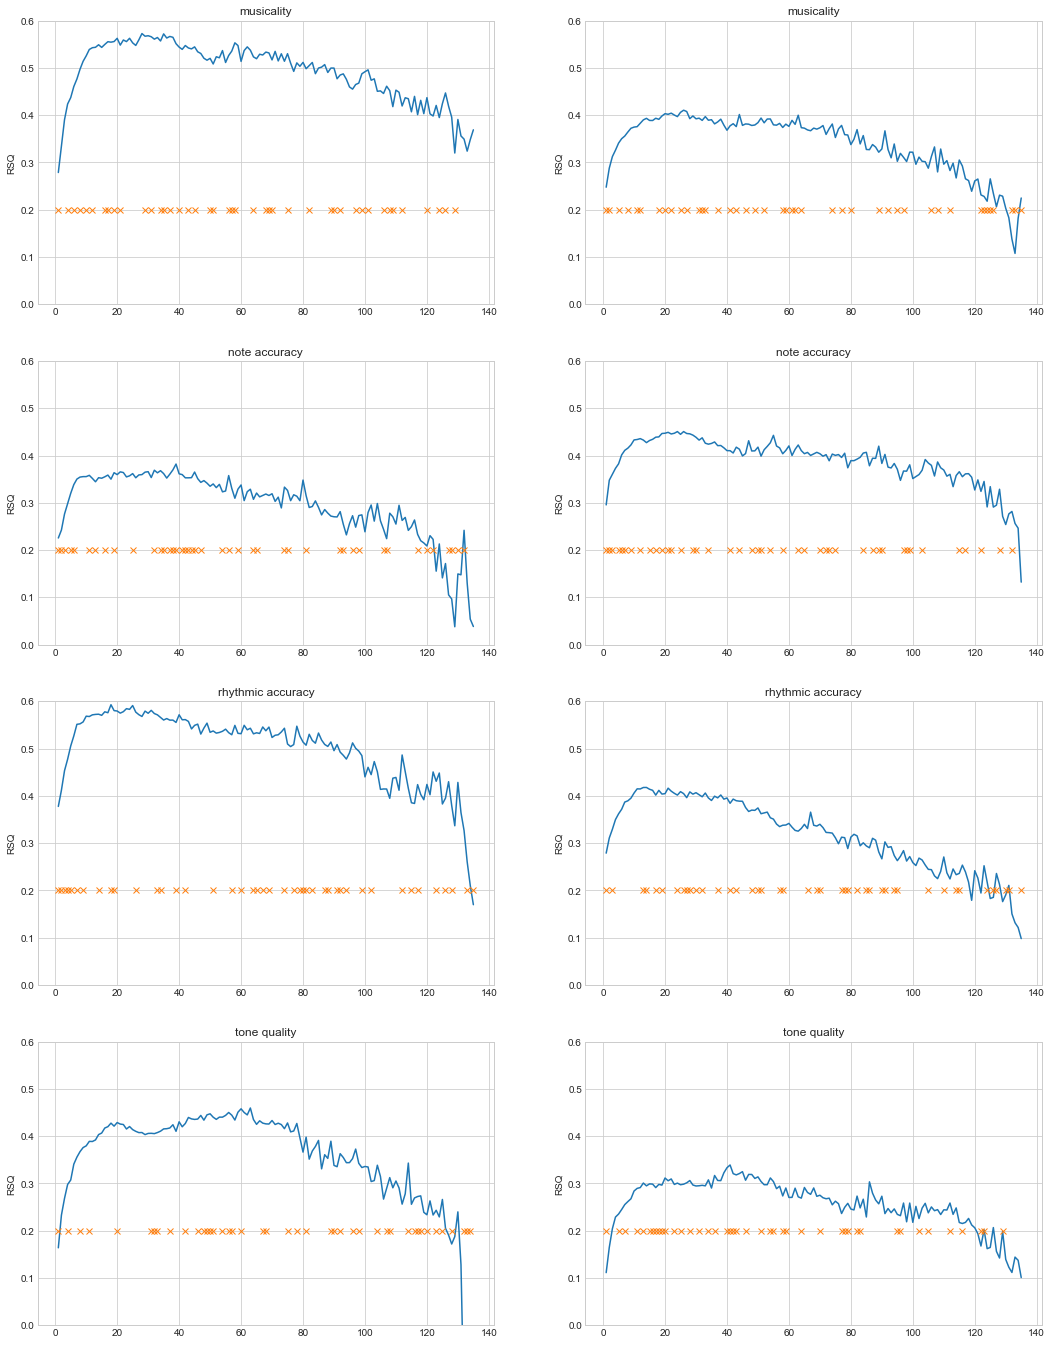

In [9]:
# compare the same group of feature among categories
compareCategories(feature_score)

In [186]:
# feature groups
# rhythmic features: IOI-hist vs. note length ratio 
feature_ioi = np.concatenate((np.arange(86, 93), np.arange(108, 114)))
feature_nlratio = np.arange(119, 136)

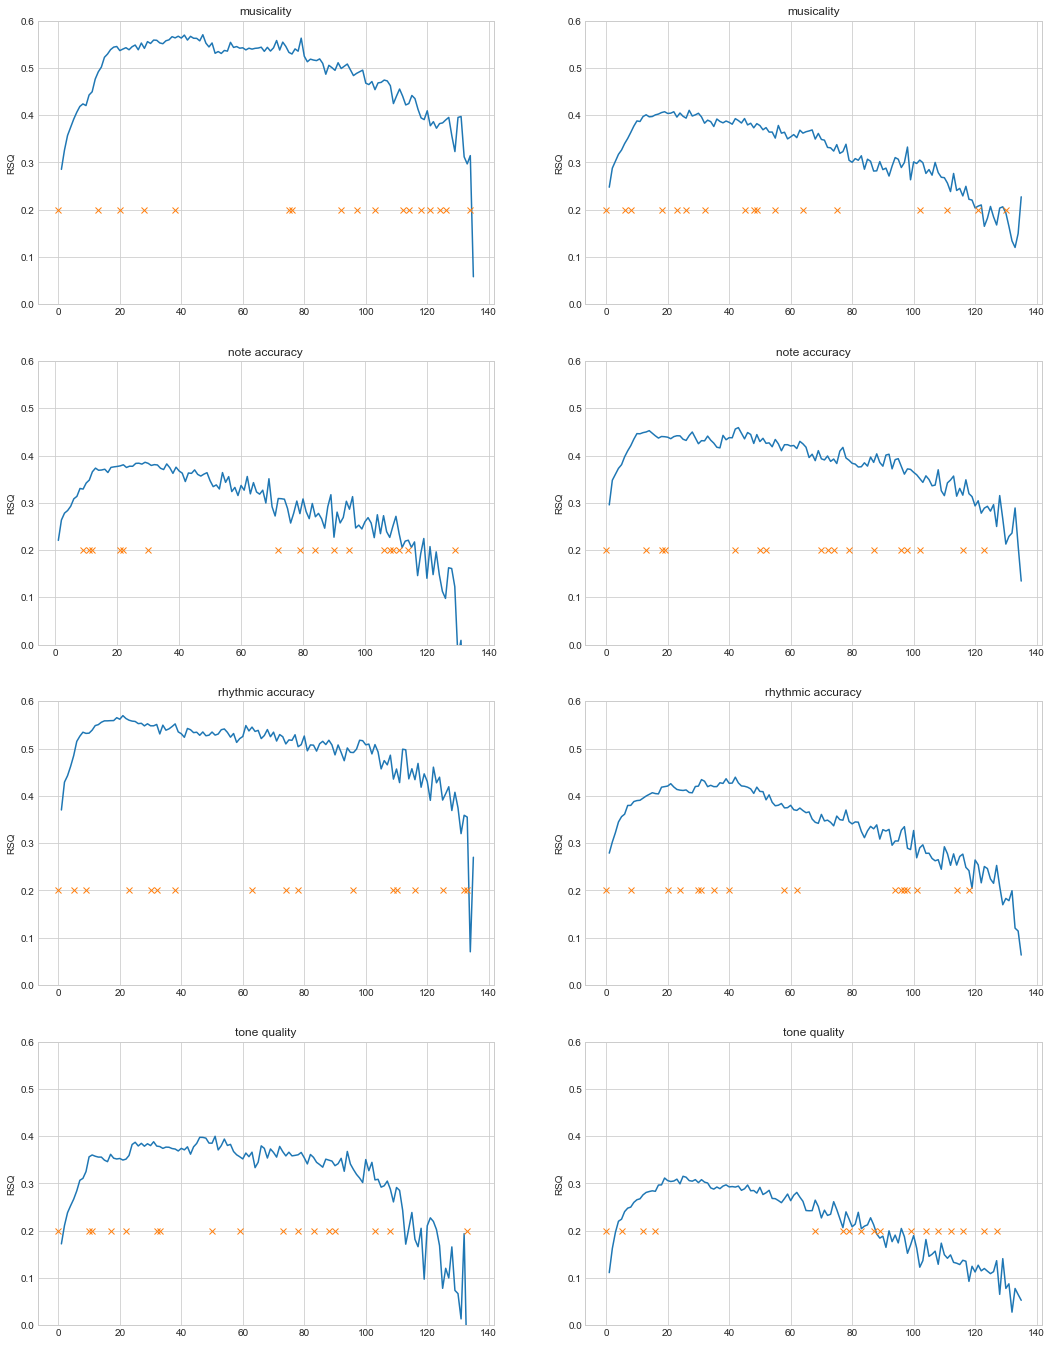

In [187]:
compareCategories(feature_nlratio)

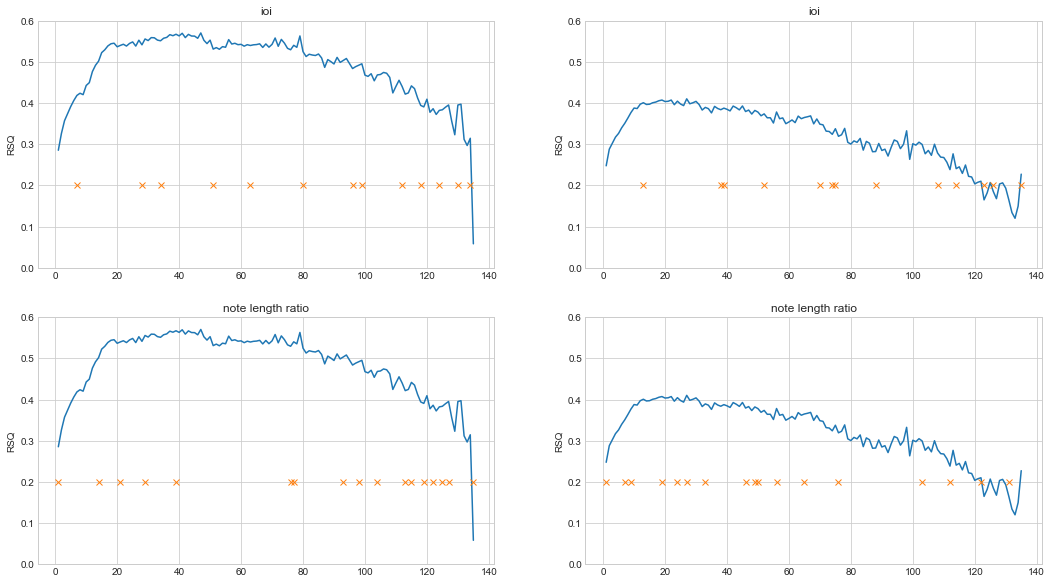

In [188]:
# compare different group of featues for one category
featureGroups = [feature_ioi, feature_nlratio]
groupNames = ['ioi', 'note length ratio']
compareGroups(1, featureGroups, groupNames) # Musicality

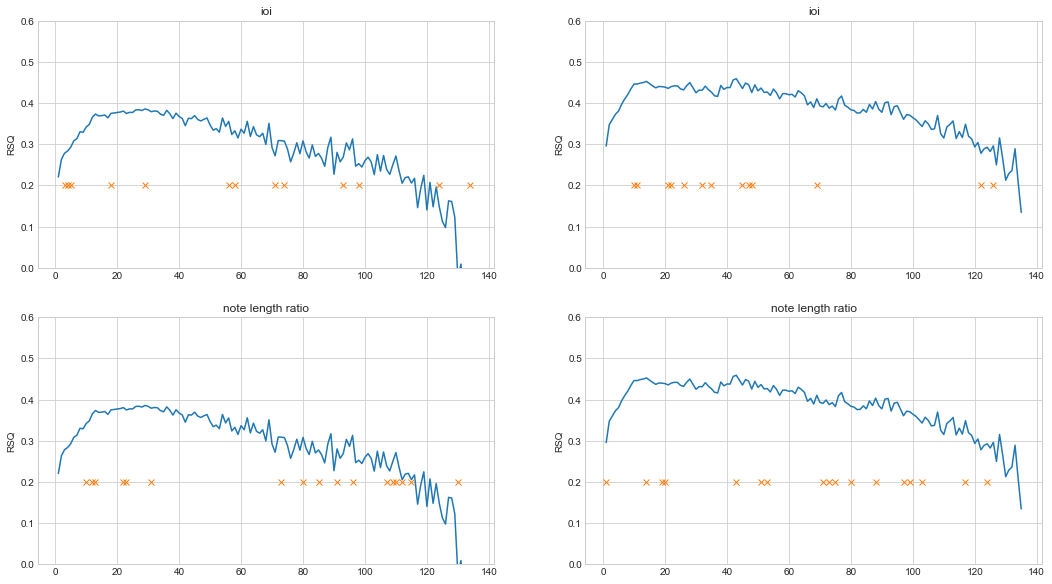

In [189]:
compareGroups(2, featureGroups, groupNames) # note accuracy

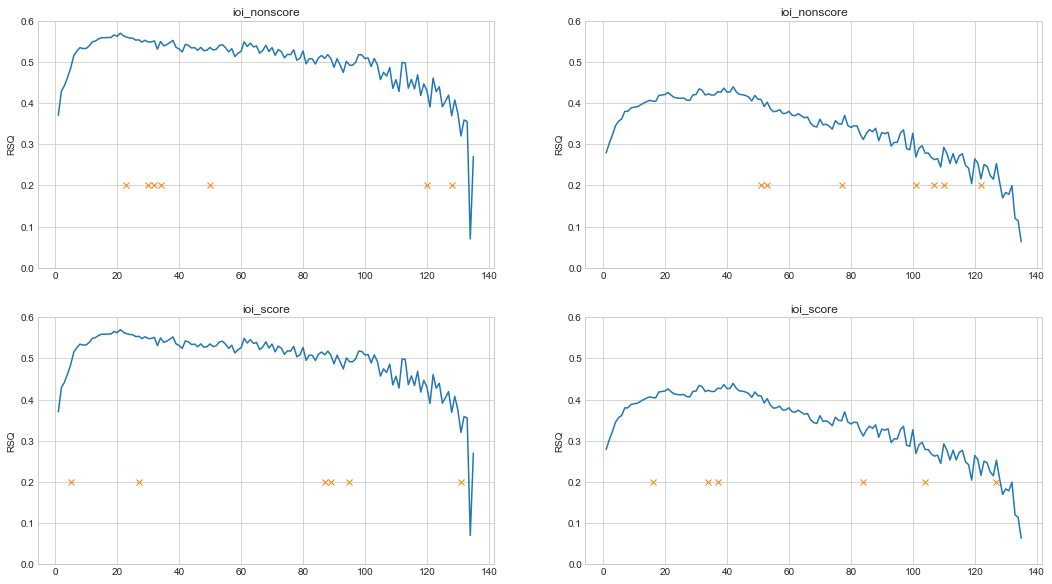

In [190]:
# ioi_nonscore ioi_score
feature_ioi_1 = np.arange(86, 93)
feature_ioi_2 = np.arange(108, 114)
featureGroups = [feature_ioi_1, feature_ioi_2]
groupNames = ['ioi_nonscore', 'ioi_score']
compareGroups(3, featureGroups, groupNames)

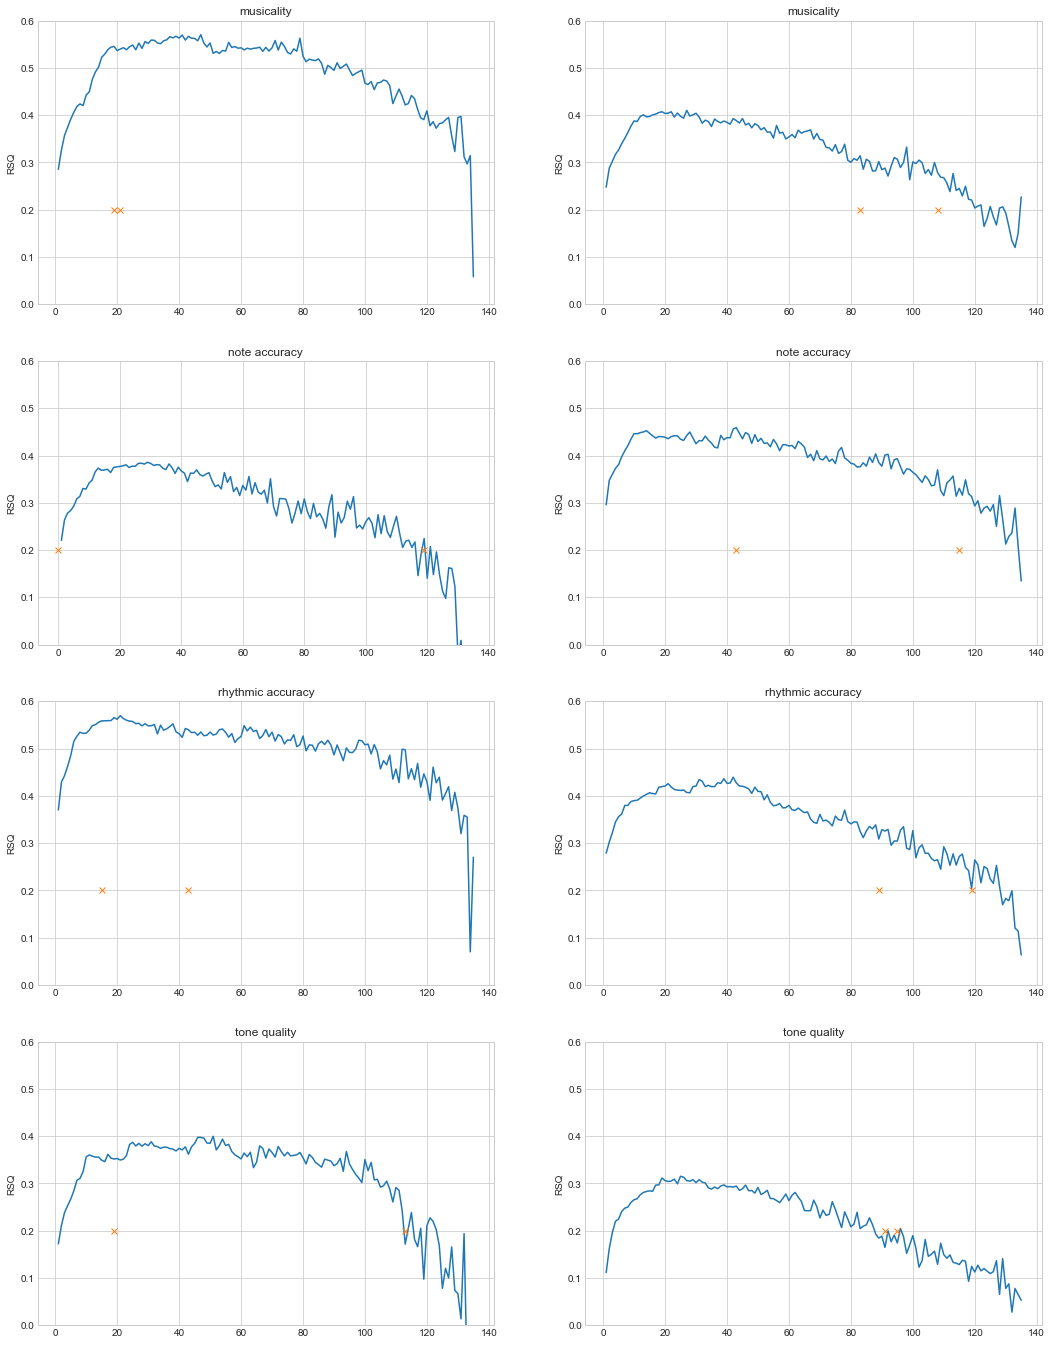

In [191]:
# DTW cost and slope deviation
feature_dtw_1 = np.arange(106, 108) #np.concatenate((np.arange(106, 108), np.arange(115, 119)))
# compare the same group of feature among categories
compareCategories(feature_dtw_1)
# helpful for technical exercise but not that helpful for sight-reading

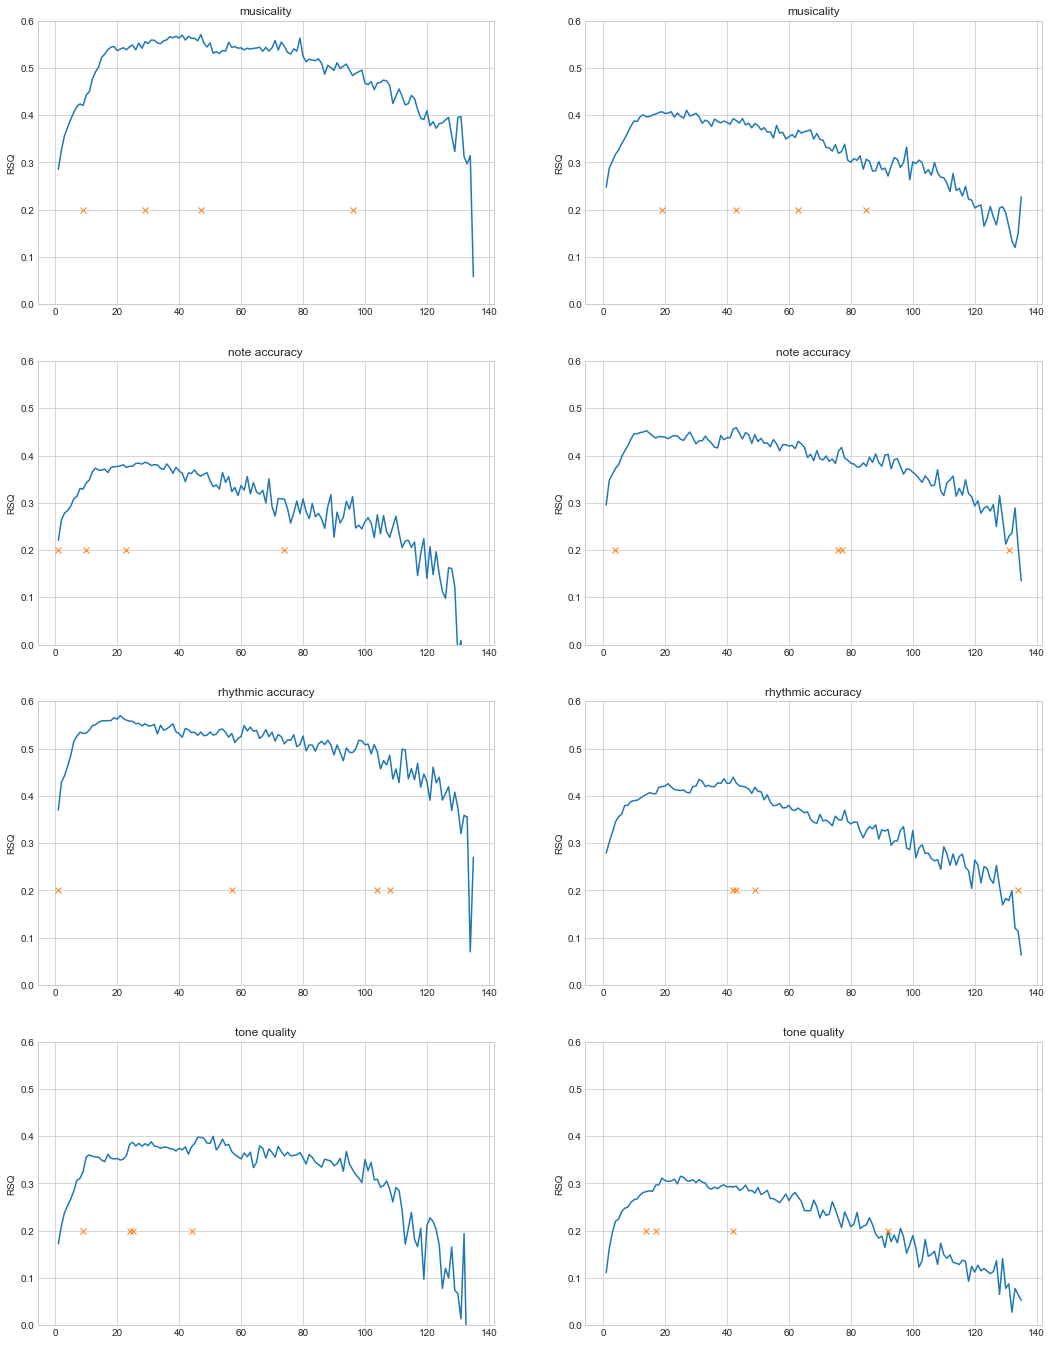

In [192]:
# DTW jump & non-jump cost, number of jumps, distance of jumps
feature_dtw_2 = np.arange(115, 119)
# compare the same group of feature among categories
compareCategories(feature_dtw_2)
# rhythmic accuracy?

In [193]:
# feature groups
# mean vs std (in note steadiness)
feature_mean = np.array([69,73,77,81,94,98,102])
feature_std = np.array([70,74,78,82,95,99,103])

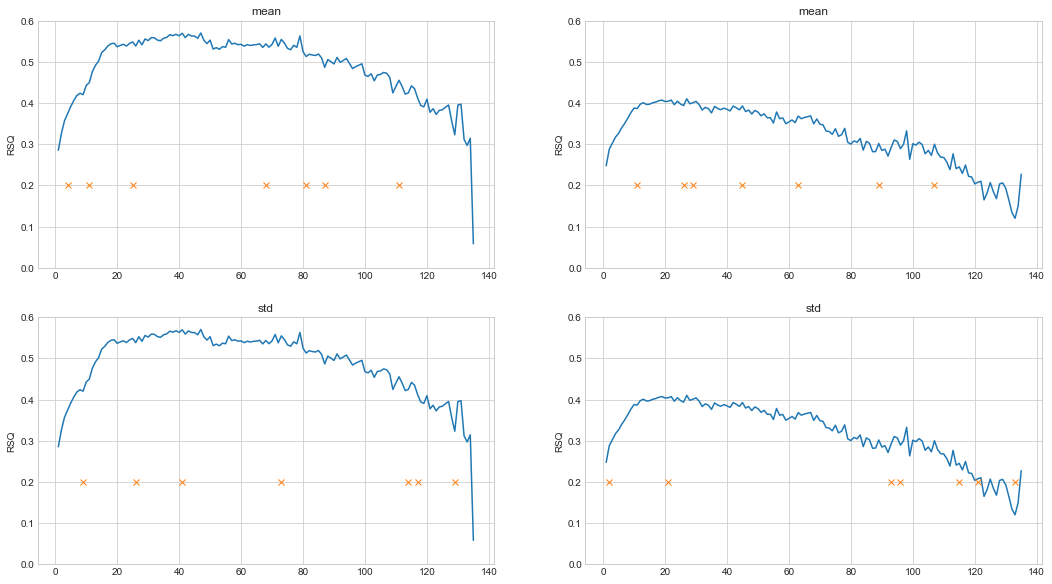

In [194]:
# compare different group of featues for one category
featureGroups = [feature_mean, feature_std]
groupNames = ['mean', 'std']
compareGroups(1, featureGroups, groupNames)

In [195]:
# feature groups
# mean vs std (in note steadiness)
feature_nlr1 = np.array([132,133])
feature_nlr2 = np.arange(119,126)
feature_nlr3 = np.arange(126,132)
feature_nlr4 = np.array([134,135])

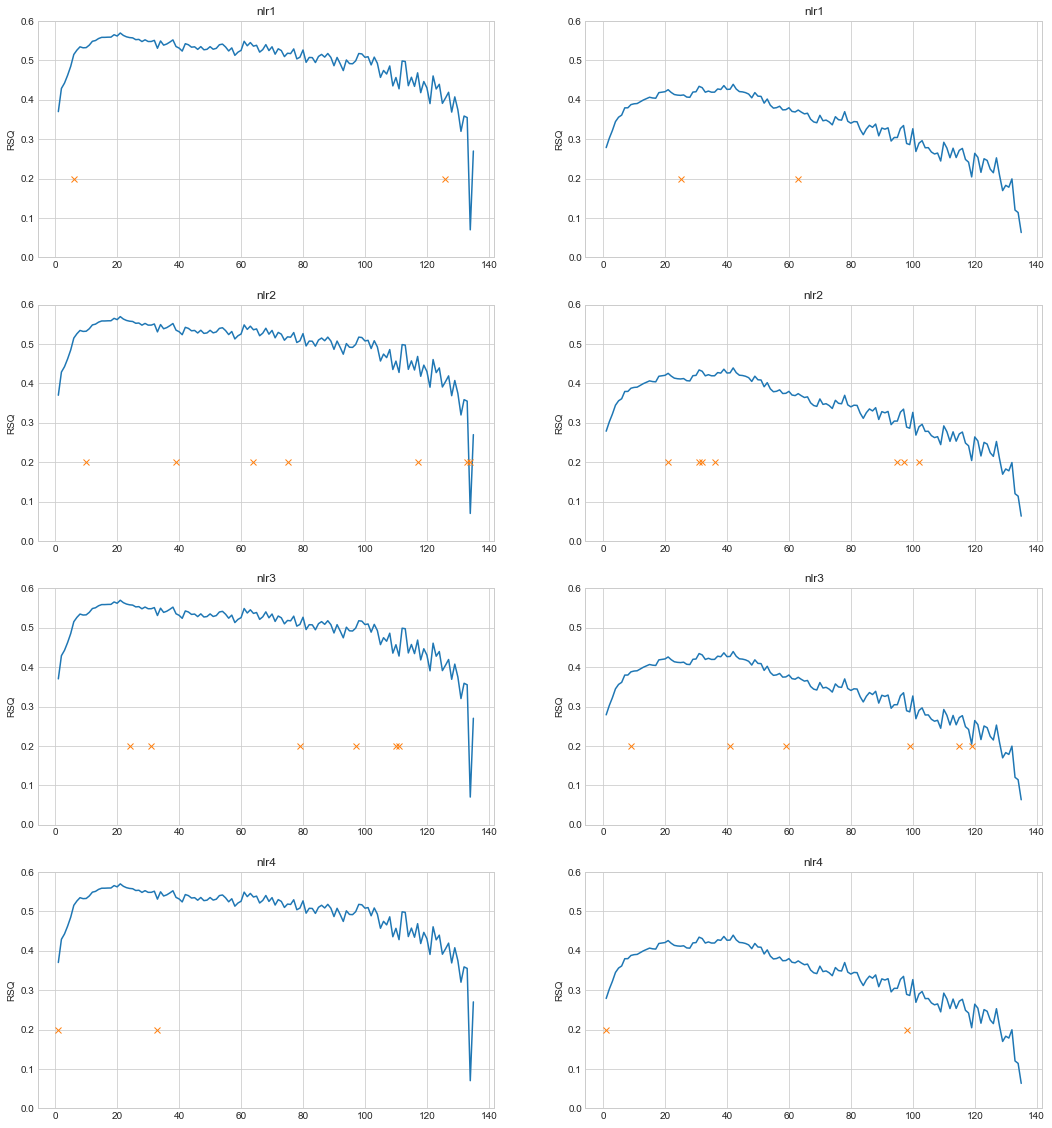

In [197]:
featureGroups = [feature_nlr1,feature_nlr2, feature_nlr3, feature_nlr4]
groupNames = ['nlr1', 'nlr2', 'nlr3', 'nlr4']
compareGroups(3, featureGroups, groupNames)